<a href="https://colab.research.google.com/github/manisankar29/CODSOFT/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK3**

# **CUSTOMER CHURN PREDICTION**

## **Importing required libraries**

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
print(os.listdir())
warnings.filterwarnings('ignore')

['.config', 'drive', 'sample_data']


## **Importing and understanding datasets**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Churn_Modelling.csv')

### Printing out few columns

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Describing the data

In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### checking for null values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Checking for duplicated values

In [ ]:
data.duplicated().sum()

0

### Identifying unique values

In [ ]:
data.Exited.unique()

array([1, 0])

## **Exploratory Data Analysis**

### Dropping unwanted columns

In [ ]:
data.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

### Counting Geography values

In [25]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

### Counting Gender values

In [26]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

### Getting dummies for Geography and Gender

In [27]:
data = pd.get_dummies(data, columns=['Geography','Gender'], drop_first=True)

In [28]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


## **Train Test Split**

In [30]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['Exited'])
Y = data['Exited']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [37]:
X_train.shape

(7500, 11)

In [38]:
X_test.shape

(2500, 11)

In [39]:
Y_train.shape

(7500,)

In [40]:
Y_test.shape

(2500,)

## **Model Fitting**

In [35]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)
score_lr = round(accuracy_score(Y_pred_lr, Y_test)*100,2)
print(f"The accuracy score achieved using Logistic Regression is: {score_lr}")

The accuracy score achieved using Logistic Regression is: 81.04


### Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=2)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)
score_rf = round(accuracy_score(Y_pred_rf, Y_test)*100,2)
print(f"The accuracy score achieved using Random Forest is: {score_rf}")

The accuracy score achieved using Random Forest is: 86.88


### Gradient Boosting

In [44]:
import xgboost as xgb
xgb = xgb.XGBClassifier(objective="binary:logistic",random_state=0)
xgb.fit(X_train, Y_train)
Y_pred_xgb = xgb.predict(X_test)
score_xgb = round(accuracy_score(Y_pred_xgb, Y_test)*100,2)
print(f"The accuracy score achieved using XGBoost is: {score_xgb}")

The accuracy score achieved using XGBoost is: 83.08


## **Output final score**

In [46]:
scores = [score_lr, score_rf, score_xgb]
algorithms = ['Logistic Regression','Random Forest','XGBoost']
for i in range(len(algorithms)):
  print(f"The accuracy achieved using {algorithms[i]} is: {scores[i]}%")

The accuracy achieved using Logistic Regression is: 81.04%
The accuracy achieved using Random Forest is: 86.88%
The accuracy achieved using XGBoost is: 83.08%


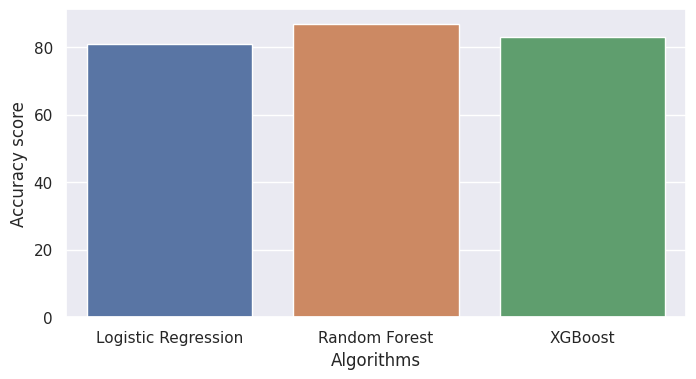

In [48]:
sns.set(rc={'figure.figsize':(8,4)})
sns.barplot(x=algorithms, y=scores)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt.show()

Therefore, Random Forest Classifier has good result when compared to other algorithms.

## **Prediction on New Data**

In [50]:
data.drop(columns=['Geography_Germany','Geography_Spain','Gender_Male'], inplace=True)

In [55]:
new_data = pd.DataFrame({
    'CreditScore': 608,
    'Age': 41,
    'Tenure': 1,
    'Balance': 83807.86,
    'NumOfProducts': 1,
    'HasCrCard': 0,
    'IsActiveMember': 1,
    'EstimatedSalary': 112542.6,
    'Geography_Germany': 0,
    'Geography_Spain': 0,
    'Gender_Male': 1,
},index=[0])

In [56]:
new_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,608,41,1,83807.86,1,0,1,112542.6,0,0,1


In [58]:
p = rf.predict(new_data)
if p[0]==0:
  print("Not Exited")
else:
  print("Exited")

Not Exited
